In [ ]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "tensorflow"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.13.0


In [3]:
#입력 차원이 1개인 단순 선형 회귀

X = np.arange(1, 6)
y = 3 * X + 2

#모델 만들기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

In [4]:
#모델의 구조 확인
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#컴파일
model.compile(optimizer='sgd', loss='mean_squared_error',
             metrics=['mean_squared_error', 'mean_absolute_error'])

#축약해서 작성
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

#매개변수를 인스턴스 나 함수 또는 변수로 설정
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.005),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics = [tf.keras.losses.MeanSquaredError(),
                         tf.keras.losses.MeanAbsoluteError()])

In [11]:
#훈련
#verbose = 0을 추가하면 훈련 과정의 내용이 출력되지 않습니다.
history = model.fit(X, y, epochs=2000)

loss
mean_squared_error
mean_absolute_error


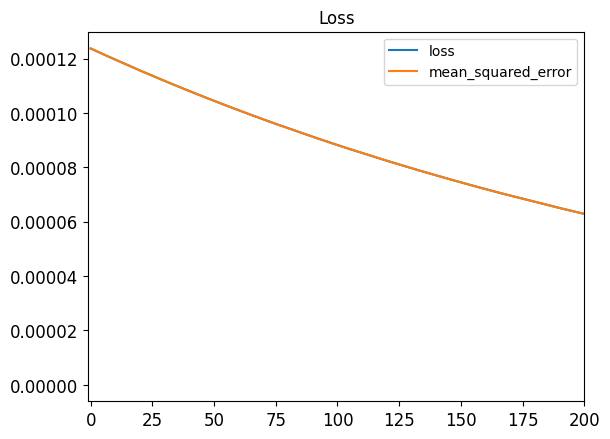

In [16]:
#훈련 과정에서 발생하는 손실 값 과 평가 지표 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
plt.xlim(-1, 200)
plt.title("Loss")
plt.legend()
plt.show()

In [17]:
#검증
model.evaluate(X, y)

1/1 [==============================] - 0s 120ms/step - loss: 1.4382e-07 - mean_squared_error: 1.4382e-07 - mean_absolute_error: 3.2530e-04


[1.4381971880084166e-07, 1.4381971880084166e-07, 0.00032529831514693797]

In [18]:
#예측
model.predict([10])

1/1 [==============================] - 0s 77ms/step


array([[32.001568]], dtype=float32)

## 화이트 와 레드 와인 이항 분류

### 데이터 가져오기

In [26]:
import pandas as pd
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
print(white.head())
print(red.head())




   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.0              0.27         0.36  ...       0.45      8.8        6
1            6.3              0.30         0.34  ...       0.49      9.5        6
2            8.1              0.28         0.40  ...       0.44     10.1        6
3            7.2              0.23         0.32  ...       0.40      9.9        6
4            7.2              0.23         0.32  ...       0.40      9.9        6

[5 rows x 12 columns]
   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4   

In [27]:
#타겟 만들기
red['type'] = 0
white['type'] = 1

#2개의 데이터를 세로 방향으로 합치기
wine = pd.concat([red, white])
print(wine.describe())

       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75%         7.700000          0.400000  ...     6.000000     1.000000
max        15.900000          1.580000  ...     9.000000     1.000000

[8 rows x 13 columns]


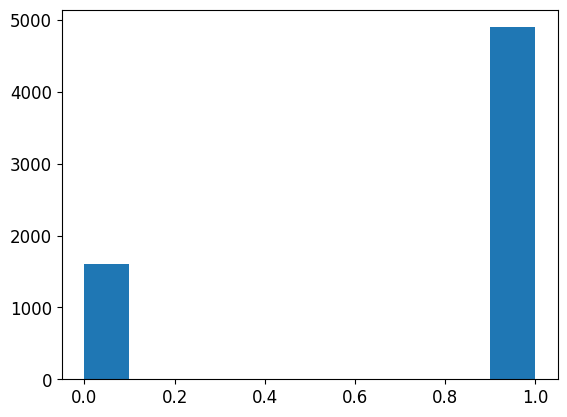

In [28]:
# 타겟 분포 확인
plt.hist(wine['type'])
plt.show()
#3배 정도 차이가 나는데 이 정도는 괜찮음

In [29]:
#데이터 정규화
#sklearn 의 MinMaxScaler를 이용한 것 과 동일
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
print(wine_norm.head())
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [30]:
#데이터 샘플링
wine_shuffle = wine_norm.sample(frac=1) #데이터를 섞어서 리턴 - frac은 데이터의 비율
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
1504       0.264463          0.060000     0.445783  ...  0.608696  0.833333   1.0
1419       0.322314          0.373333     0.126506  ...  0.275362  0.333333   0.0
3162       0.247934          0.206667     0.204819  ...  0.579710  0.666667   1.0
3091       0.206612          0.133333     0.283133  ...  0.217391  0.500000   1.0
2433       0.297521          0.180000     0.120482  ...  0.130435  0.500000   1.0

[5 rows x 13 columns]


In [34]:
#pandas의 DataFrame을 numpy 배열로 변환
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

[[0.26446281 0.06       0.44578313 0.18711656 0.05980066 0.07986111
  0.2764977  0.13668787 0.41860465 0.08988764 0.60869565 0.83333333
  1.        ]
 [0.32231405 0.37333333 0.12650602 0.02453988 0.11295681 0.10763889
  0.29262673 0.16367843 0.42635659 0.12921348 0.27536232 0.33333333
  0.        ]
 [0.24793388 0.20666667 0.20481928 0.10429448 0.01827243 0.12847222
  0.29262673 0.09658762 0.35658915 0.12359551 0.57971014 0.66666667
  1.        ]
 [0.20661157 0.13333333 0.28313253 0.16257669 0.05149502 0.20833333
  0.4078341  0.1698477  0.31007752 0.16292135 0.2173913  0.5
  1.        ]
 [0.29752066 0.18       0.12048193 0.20398773 0.07475083 0.21527778
  0.51382488 0.22691344 0.30232558 0.15730337 0.13043478 0.5
  1.        ]]


In [36]:
#훈련에 사용할 데이터로 생성
train_idx = int(len(wine_np) * 0.8)

#train_idx 기준으로 행 단위로 분할해서 train 과 test로 분할하고
#맨 마지막 열을 기준으로 열 단위로 분할해서 feature 와 target으로 분리
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx:, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:,-1]

#레드 와 화이트로 분류할 것이라서 타겟을 원핫 인코딩 수행
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
print(train_X.shape, test_X.shape)
print(train_Y.shape, test_Y.shape)

(5197, 12) (1300, 12)
(5197, 2) (1300, 2)


In [40]:
#분류 모델
#이항 분류이고 피처의 개수가 12개입니다.
#첫번째 입력 층의 input_shape는 무조건 (12, )
#맨 마지막 출력 층의 units은 클래스 개수이므로 2 그리고 다항 분류이므로 activation은 softmax
#중간 층들의 units는 마음대로 설정 가능하지만 activation은 존재하는 이름을 사용해야 합니다.
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=256, activation='relu', input_shape=(12, )),
     tf.keras.layers.Dense(units=128, activation='relu'),
     tf.keras.layers.Dense(units=64, activation='relu'),
     tf.keras.layers.Dense(units=32, activation='relu'),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=2, activation='softmax')]
)
#최적화 함수는 Adam이고 학습률은 0.03
#손실 함수는 카테고리 크로스 엔트로피
#평가 지표는 정확도
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.03),
              loss='categorical_crossentropy', metrics=['accuracy'])

#구조 확인
model.summary()

#훈련
history = model.fit(train_X, train_Y, epochs=25)










Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 256)               3328      
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 2)                 34        
                                                                 
Total params: 47122 (184.07 KB)
Trainable params: 4712

In [42]:
#훈련
#validation_split을 설정하면 그 비율만큼을 검증 데이터로 사용해서 검증을 수행
#batch_size는 데이터를 분할해서 학습을 수행
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25,
                    batch_size=64)


Epoch 1/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.0171 - val_accuracy: 0.9969
Epoch 2/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0180 - val_accuracy: 0.9962
Epoch 3/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.0184 - val_accuracy: 0.9954
Epoch 4/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0178 - val_accuracy: 0.9969
Epoch 5/25
61/61 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0172 - val_accuracy: 0.9954
Epoch 6/25
61/61 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.0231 - val_accuracy: 0.9962
Epoch 7/25
61/61 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0164 - val_accuracy: 0.9969
Epoch 8/25
61/61 [==

In [43]:
#평가
model.evaluate(test_X, test_Y)

41/41 [==============================] - 0s 1ms/step - loss: 0.0496 - accuracy: 0.9938


[0.04959750175476074, 0.9938461780548096]

In [ ]:
## 품질을 3가지로 나누어서 분류

In [44]:
print(wine['quality'].describe())
print(wine['quality'].value_counts())
#3~5를 0, 6을 1 7~9 를 2로 그룹화

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [46]:
#타겟 생성
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
print(wine.head())

   fixed acidity  volatile acidity  citric acid  ...  quality  type  new_quality
0            7.4              0.70         0.00  ...        5     0          0.0
1            7.8              0.88         0.00  ...        5     0          0.0
2            7.8              0.76         0.04  ...        5     0          0.0
3           11.2              0.28         0.56  ...        6     0          1.0
4            7.4              0.70         0.00  ...        5     0          0.0

[5 rows x 14 columns]


In [56]:
#피처 정규화
#del wine['quality']
del wine['type']
wine_backup = wine.copy() #복제본 생성

#타겟을 제외한 부분을 정규화
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_quality'] = wine_backup['new_quality']
print(wine_norm.head())

   fixed acidity  volatile acidity  ...   alcohol  new_quality
0       0.297521          0.413333  ...  0.202899          0.0
1       0.330579          0.533333  ...  0.260870          0.0
2       0.330579          0.453333  ...  0.260870          0.0
3       0.611570          0.133333  ...  0.260870          1.0
4       0.297521          0.413333  ...  0.202899          0.0

[5 rows x 12 columns]


In [57]:
#훈련 데이터 와 테스트 데이터를 분할
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()
train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
#타겟을 원핫인코딩 하기
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [67]:
#모델 만들기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2048, activation='relu', input_shape = (11, )),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.005),
              loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_Y, epochs=200, batch_size=32, validation_split=0.25)
model.evaluate(test_X, test_Y)







Epoch 1/200
122/122 [==============================] - 6s 33ms/step - loss: 0.9864 - accuracy: 0.4935 - val_loss: 0.9303 - val_accuracy: 0.5200
Epoch 2/200
122/122 [==============================] - 4s 31ms/step - loss: 0.9382 - accuracy: 0.5422 - val_loss: 0.9074 - val_accuracy: 0.5738
Epoch 3/200
122/122 [==============================] - 4s 35ms/step - loss: 0.9751 - accuracy: 0.5089 - val_loss: 0.9093 - val_accuracy: 0.5769
Epoch 4/200
122/122 [==============================] - 4s 31ms/step - loss: 0.9227 - accuracy: 0.5291 - val_loss: 0.8896 - val_accuracy: 0.5269
Epoch 5/200
122/122 [==============================] - 4s 31ms/step - loss: 0.8868 - accuracy: 0.5607 - val_loss: 0.8926 - val_accuracy: 0.5508
Epoch 6/200
122/122 [==============================] - 4s 34ms/step - loss: 0.8748 - accuracy: 0.5684 - val_loss: 0.8597 - val_accuracy: 0.5854
Epoch 7/200
122/122 [==============================] - 4s 30ms/step - loss: 0.8788 - accuracy: 0.5591 - val_loss: 0.9094 - val_accuracy:

[1.9828886985778809, 0.6730769276618958]